In [9]:
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression

%matplotlib inline
import matplotlib.pyplot as plt

In [55]:
ds = datasets.load_boston()
X = ds['data']
y = ds['target']
X_train = X[:int(len(X)*0.75)]
y_train = y[:int(len(X)*0.75)]
X_test = X[int(len(X)*0.75):]
y_test = y[int(len(X)*0.75):]


base_algorithms_list = []
coefficients_list = np.array([])

y_temp = y_train
X_temp = X_train

def DerevateSquaredError(y_pred,y):
    sx = []
    for i,(y_predi,yi) in enumerate(zip(y_pred,y)):
        sx = np.append(sx,-(y_predi-yi))
    return  sx

def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

# начальный вектор сдвигов после 1 обучения пока 10 итераций
for n in range(0,50):
    #создал модель
    base_algorithms_list = np.append(base_algorithms_list,DecisionTreeRegressor(random_state=42, max_depth=5))
    # создал коэффициент
    coefficients_list = np.append(coefficients_list,0.9)
    # произвел обучение
    base_algorithms_list[n].fit(X_temp,y_temp)
    #получил предсказание
    prediction = gbm_predict(X_temp)
    # вычисляем новое значение сдвига
    y_temp = DerevateSquaredError(prediction,y_train)
    
print mean_squared_error(y_train,prediction)**0.5

0.00258447429932


In [56]:
def write_answer_2(ans):
    with open("dtc_answer2.txt", "w") as fout:
        fout.write(str(ans))

In [57]:
write_answer_2(mean_squared_error(y_train,prediction)**0.5)

In [58]:
prediction = gbm_predict(X_test)
print mean_squared_error(y_test,prediction)**0.5

5.47665097417


In [59]:
write_answer_2(mean_squared_error(y_test,prediction)**0.5)

In [60]:
base_algorithms_list = []
coefficients_list = np.array([])
y_temp = y_train
X_temp = X_train
# начальный вектор сдвигов после 1 обучения пока 10 итераций
for n in range(0,50):
    #создал модель
    base_algorithms_list = np.append(base_algorithms_list,DecisionTreeRegressor(random_state=42, max_depth=5))
    # создал коэффициент
    coefficients_list = np.append(coefficients_list,0.9 / (1.0 + n))
    # произвел обучение
    base_algorithms_list[n].fit(X_temp,y_temp)
    #получил предсказание
    prediction = gbm_predict(X_temp)
    # вычисляем новое значение сдвига
    y_temp = DerevateSquaredError(prediction,y_train)
    
print mean_squared_error(y_train,prediction)**0.5

0.928266320729


In [61]:
prediction = gbm_predict(X_test)
print mean_squared_error(y_test,prediction)**0.5

4.81089328026


In [62]:
def write_answer_3(ans):
    with open("dtc_answer3.txt", "w") as fout:
        fout.write(str(ans))
write_answer_3(mean_squared_error(y_test,prediction)**0.5)

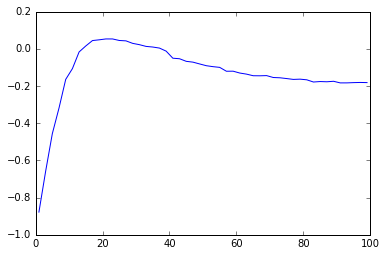

In [63]:
xs = []
ys = []
for x in np.arange(1, 100, 2):
    r = GradientBoostingRegressor(n_estimators=x, random_state=42)
    r.fit(X_train, y_train)
    prediction = r.predict(X_test)

   
    #print "count trees:", n , "ошибка", mean_squared_error(y_test,prediction)
    xs.append(x)
    ys.append(cross_val_score(r, X_test, y_test).mean())
    #ys.append(mean_squared_error(y_test,prediction))
    
plt.plot(xs, ys)

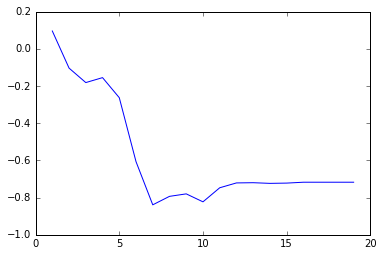

In [64]:
xs = []
ys = []
for x in np.arange(1,20, 1):
    r = GradientBoostingRegressor(max_depth=x, random_state=42)
    r.fit(X_train, y_train)
    prediction = r.predict(X_test)
    xs.append(x)
    ys.append(cross_val_score(r, X_test, y_test).mean())
    #ys.append(mean_squared_error(y_test,prediction))
    
plt.plot(xs, ys)

1. С увеличением числа деревьев начиная с некоторого момента качество работы градиентного бустинга не меняется существенно.
2. С увеличением числа деревьев начиная с некоторого момента градиентный бустинг начинает переобучаться.
3. С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга на тестовой выборке начинает ухудшаться
4. С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга перестает существенно изменяться


In [65]:
#1 3 4
#1 3
def write_answer_4(a1,a2):
    answers = [a1, a2]
    with open("dtc_answer4.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in answers]))
        
write_answer_4(2,3)

В самом деле, градиентный бустинг все больше подгоняется под данные с ростом числа деревьев, а рост глубины деревьев только ускоряет этот процесс. Начиная с некоторого момента алгоритм будет все больше переобучаться.

In [67]:
estimator = LinearRegression()
estimator.fit(X_train,y_train)
prediction = estimator.predict(X_test)
print mean_squared_error(y_test,prediction)**0.5


8.27046803494


In [68]:
def write_answer_5(ans):
    with open("dtc_answer5.txt", "w") as fout:
        fout.write(str(ans))
write_answer_5(mean_squared_error(y_test,prediction)**0.5)